In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data = pd.read_csv('ex2data1.txt', header = None)
x = data.iloc[:, 0:2]
y = data.iloc[:, 2]

data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [15]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


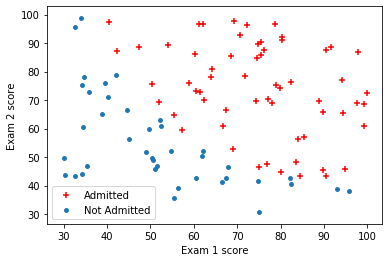

In [16]:
pos, neg = (y == 1), (y == 0)
plt.scatter(x[pos][0], x[pos][1], color = 'r', marker = '+')
plt.scatter(x[neg][0], x[neg][1], s = 15)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(('Admitted', 'Not Admitted'))

In [17]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [18]:
(m, n) = x.shape
x_normalized, X_mean, X_std = featureNormalization(x)
X = np.hstack((np.ones((m, 1)), x_normalized))
Y = y[:, np.newaxis]
theta = np.zeros((n+1, 1))

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(X, y, theta):
    y_pred = sigmoid(np.dot(X, theta))
    error = (-y * np.log(y_pred) - (1 - y) * np.log(1-y_pred))
    cost = 1/m * np.sum(error)
    
    gradient = 1/m * np.dot(X.T, (y_pred - y))
    
    return cost, gradient

J, gradient = costFunction(X, Y, theta)
print('Cost at initial theta (zeros): '+ str(J))
print('Gradient at initial theta (zeros): \n'+ str(gradient))

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): 
[[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [20]:
def gradientDescent(X, y, theta, alpha, iteration):
    J_history = []
    for i in range(iteration):
        cost, gradient = costFunction(X, y, theta)
        theta = theta - (alpha * gradient)
        J_history.append(cost)
        
    return theta, J_history
    
alpha = 1
iteration = 400
theta1, J_history = gradientDescent(X, Y,theta, alpha, iteration)
print('Theta:\n'+ str(theta1))
print('\nCost at optimized theta: '+ str(J_history[-1]) )

Theta:
[[1.65947664]
 [3.8670477 ]
 [3.60347302]]

Cost at optimized theta: 0.2036004424822666


Text(0.5, 1.0, 'Cost function using Gradient Descent')

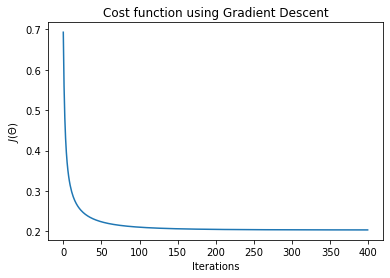

In [21]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

## Plotting Decision Boundary

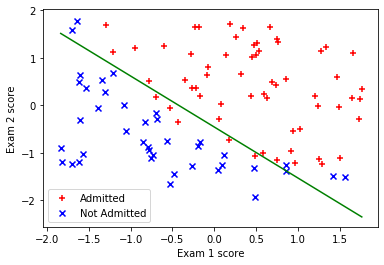

In [22]:
adm = plt.scatter(X[pos, 1], X[pos, 2], color = 'r', marker = '+')
not_adm = plt.scatter(X[neg, 1], X[neg, 2], color = 'b', marker = 'x')

x_plot = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_plot = - (theta1[0] + theta1[1] * x_plot) / theta1[2]

plt.plot(x_plot, y_plot, color = 'g')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not Admitted'))

## Accuracy of Model

In [23]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    return acc * 100

print('Training Accuracy = '+ str(accuracy(X, Y, theta1, 0.5)) +' %')

Training Accuracy = 89.0 %


## Prediction

In [24]:
print('Enter score of exam 1 & exam 2')
sample = np.array([int(i) for i in input().split()])
x_test = (sample - X_mean) / X_std
x_test = np.hstack((np.ones(1), x_test))

prob = sigmoid(np.dot(x_test, theta1))
print('Admission probability  = '+ str(np.round(prob[0], 2) * 100) +' %')
    

Enter score of exam 1 & exam 2
62 67
Admission probability  = 75.0 %
